## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from numpy import asarray
from numpy import savetxt
import matplotlib.colors as mcolors
import matplotlib.cm
import matplotlib.patches as mpatches
import umap
import matplotlib as mpl
import scanpy as sc
import scipy
import kmapper as km
from kmapper import jupyter
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import sys
from sklearn import ensemble
import tqdm
from ripser import Rips
from ripser import ripser
from persim import plot_diagrams
from sklearn.metrics.pairwise import euclidean_distances
import umap

## Read in data

In [2]:
gene_expression = pd.read_csv("final_geneexpression.csv", sep=',', header = 0, index_col = 0)
labels = pd.read_csv("final_labels.csv", sep=',', header = 0, index_col = 0)

In [3]:
gene_expression

,20170905-A01,20170905-A02,20170905-A03,20170905-A06,20170905-A07,20170905-A08,20170905-A09,20170905-A10,20170905-A11,20170905-A12,...,20170924-G05,20170924-G06,20170924-G07,20170924-G09,20170924-G12,20170924-H03,20170924-H05,20170924-H07,20170924-H08,20170924-H11
EGFP,22,12,43,31,56,30,28,26,15,27,...,41,37,46,13,31,3,6,35,39,30
ENSG00000000003,14,8,3,7,11,18,3,5,8,9,...,17,4,8,1,6,2,16,9,17,5
ENSG00000000419,11,6,3,4,1,7,9,10,3,9,...,9,11,3,6,8,7,14,7,12,6
ENSG00000000457,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,4,1,1
ENSG00000000460,3,0,2,4,1,0,4,1,0,1,...,5,0,3,1,2,0,4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC-00163,1,0,1,3,1,3,1,0,3,0,...,1,0,0,0,0,2,1,1,3,1
ERCC-00165,8,4,1,2,3,2,0,2,5,1,...,1,0,0,1,1,2,3,4,5,3
ERCC-00170,0,1,5,1,1,0,0,0,0,3,...,0,1,0,2,0,1,0,0,0,1
ERCC-00171,147,167,171,154,179,167,168,167,147,166,...,183,162,170,145,142,168,174,148,168,156


In [4]:
labels

,experiment,well,cell_number,concentration,ERCC,individual.1,individual.2,image_individual,image_label,raw,...,rfp.median.log10sum,gfp.median.log10sum,dapi.median.log10sum,rfp.median.log10sum.adjust,gfp.median.log10sum.adjust,dapi.median.log10sum.adjust,size,perimeter,eccentricity,theta
20170905-A01,20170905,A01,1,1.726404,50x dilution,NA18855,NA18870,18870_18855,3,5746265,...,2.744765,2.954637,3.083036,0.415319,0.149738,0.269229,1358,113,0.581639,4.374619
20170905-A02,20170905,A02,1,1.445693,50x dilution,NA18855,NA18870,18870_18855,2,3997709,...,2.252281,2.518825,2.696254,-0.013086,-0.260776,-0.110300,723,81,0.508793,2.252635
20170905-A03,20170905,A03,1,1.889617,50x dilution,NA18855,NA18870,18870_18855,1,4765829,...,2.850892,3.197764,2.955256,0.329710,0.281079,0.112117,2937,172,0.433768,4.820316
20170905-A06,20170905,A06,1,2.135352,50x dilution,NA18855,NA18870,18870_18855,51,5249443,...,1.761813,2.941773,3.062226,-0.231238,0.128699,0.162145,1359,115,0.509744,0.246863
20170905-A07,20170905,A07,1,1.999640,50x dilution,NA18855,NA18870,18870_18855,6,5084206,...,2.021554,3.265179,3.169831,-0.333604,0.420206,0.224290,1795,141,0.809687,6.061320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20170924-H03,20170924,H03,1,1.403619,50x dilution,NA18870,NA19160,19160_18870,45,3544487,...,1.988120,1.808922,2.087316,-0.251185,-0.948892,-0.680583,479,74,0.897233,2.157482
20170924-H05,20170924,H05,1,2.413250,50x dilution,NA18870,NA19160,19160_18870,92,4087535,...,1.770559,2.795882,3.130760,-0.463508,0.109938,0.242358,2965,393,0.884826,0.530167
20170924-H07,20170924,H07,1,2.498777,50x dilution,NA18870,NA19160,19160_18870,46,3917460,...,2.131801,2.620315,2.995700,-0.089174,-0.234285,0.071378,1069,118,0.864127,2.043785
20170924-H08,20170924,H08,1,0.502145,50x dilution,NA18870,NA19160,19160_18870,47,4132349,...,1.964830,2.303479,2.816438,-0.498783,-0.543224,-0.073613,1375,147,0.947345,1.778055


In [5]:
labels.columns

Index(['experiment', 'well', 'cell_number', 'concentration', 'ERCC',
       'individual.1', 'individual.2', 'image_individual', 'image_label',
       'raw', 'umi', 'mapped', 'unmapped', 'reads_ercc', 'reads_hs',
       'reads_egfp', 'reads_mcherry', 'molecules', 'mol_ercc', 'mol_hs',
       'mol_egfp', 'mol_mcherry', 'detect_ercc', 'detect_hs', 'chip_id',
       'chipmix', 'freemix', 'snps', 'reads', 'avg_dp', 'min_dp', 'snps_w_min',
       'valid_id', 'cut_off_reads', 'unmapped_ratios', 'cut_off_unmapped',
       'ercc_percentage', 'cut_off_ercc', 'cut_off_genes', 'ercc_conversion',
       'conversion', 'conversion_outlier', 'molecule_outlier', 'filter_all',
       'rfp.median.log10sum', 'gfp.median.log10sum', 'dapi.median.log10sum',
       'rfp.median.log10sum.adjust', 'gfp.median.log10sum.adjust',
       'dapi.median.log10sum.adjust', 'size', 'perimeter', 'eccentricity',
       'theta'],
      dtype='object')

In [6]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(gene_expression.values.T)
print(embedding.shape)

(888, 2)


In [7]:
labels["rfp.median.log10sum.adjust"].shape

(888,)

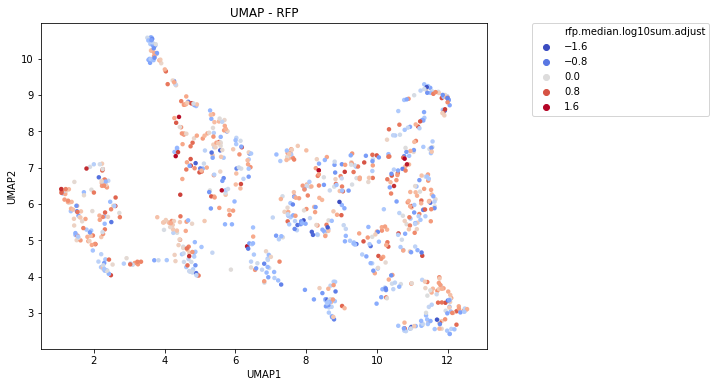

In [8]:
plt.figure(figsize=(8, 6))
            
sns.scatterplot(embedding[:,0], embedding[:,1], hue = labels["rfp.median.log10sum.adjust"], s = 20, linewidth=0, palette = "coolwarm", hue_norm=(-1,1))

plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP - RFP')
plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0)
#plt.savefig('.png')
plt.show()

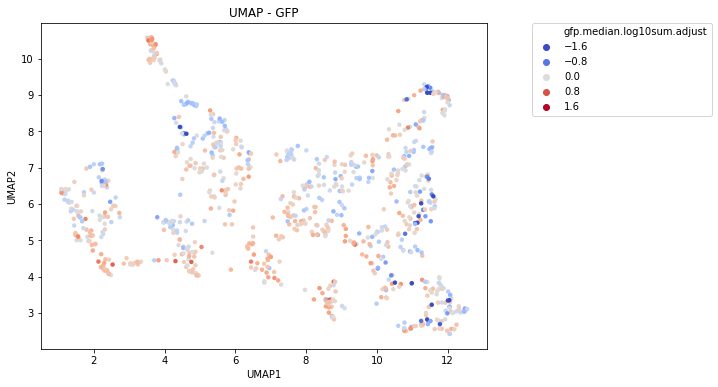

In [9]:
plt.figure(figsize=(8, 6))
            
sns.scatterplot(embedding[:,0], embedding[:,1], hue = labels["gfp.median.log10sum.adjust"], s = 20, linewidth=0, palette = "coolwarm", hue_norm=(-1,1))

plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP - GFP')
plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0)
#plt.savefig('.png')
plt.show()

## Persistence Diagram

c:\users\hmkri\desktop\riesenfeld pearson\lib\site-packages\ripser\ripser.py:257: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


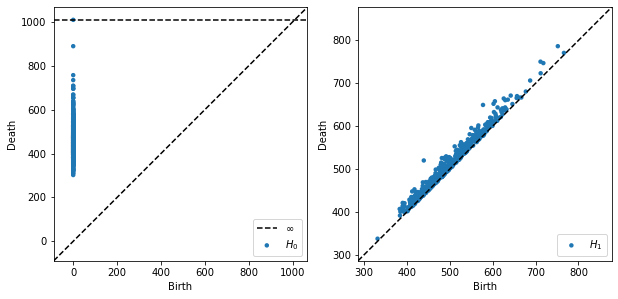

In [10]:
dgms = ripser(gene_expression.values.T, maxdim=1)['dgms']

plt.figure(figsize=(10, 5))
plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(121))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(122))

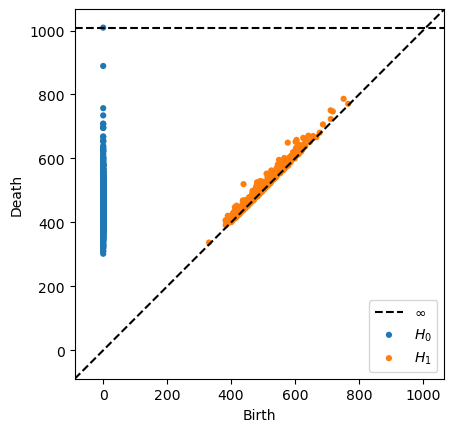

In [11]:
plot_diagrams(dgms, show=True)

## Reduce data to cyclic genes

In [22]:
CDK1 = "ENSG00000170312"
UBE2C = "ENSG00000175063"
TOP2A = "ENSG00000131747"
#H4C5 = "ENSG00000276966"
H4C3 = "ENSG00000197061"

In [27]:
gene_sub = gene_expression.loc[[CDK1, UBE2C, TOP2A, H4C3]]

In [28]:
reducer = umap.UMAP(random_state=42)
embedding_sub = reducer.fit_transform(gene_sub.values.T)
print(embedding_sub.shape)

(888, 2)


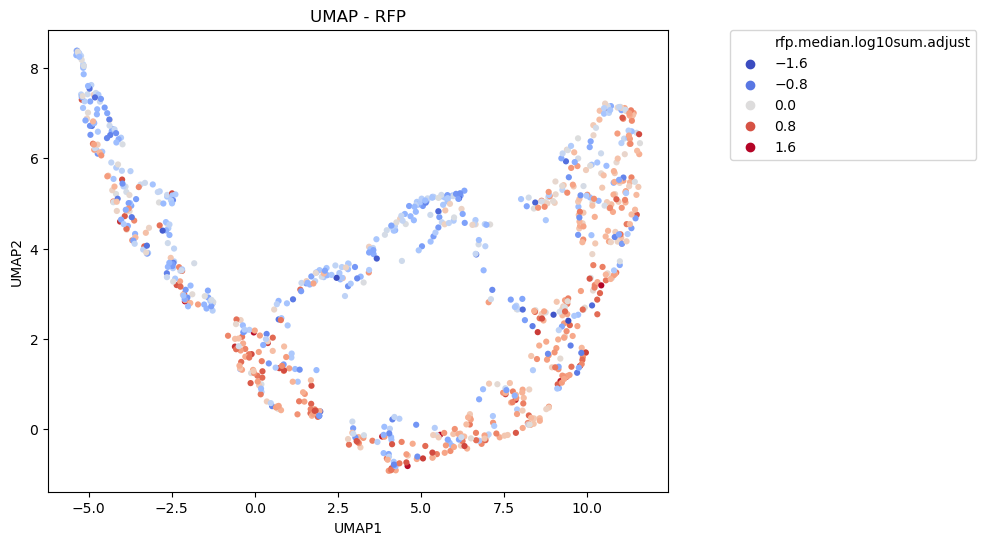

In [29]:
plt.figure(figsize=(8, 6))
            
sns.scatterplot(embedding_sub[:,0], embedding_sub[:,1], hue = labels["rfp.median.log10sum.adjust"], s = 20, linewidth=0, palette = "coolwarm", hue_norm=(-1,1))

plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP - RFP')
plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0)
#plt.savefig('.png')
plt.show()

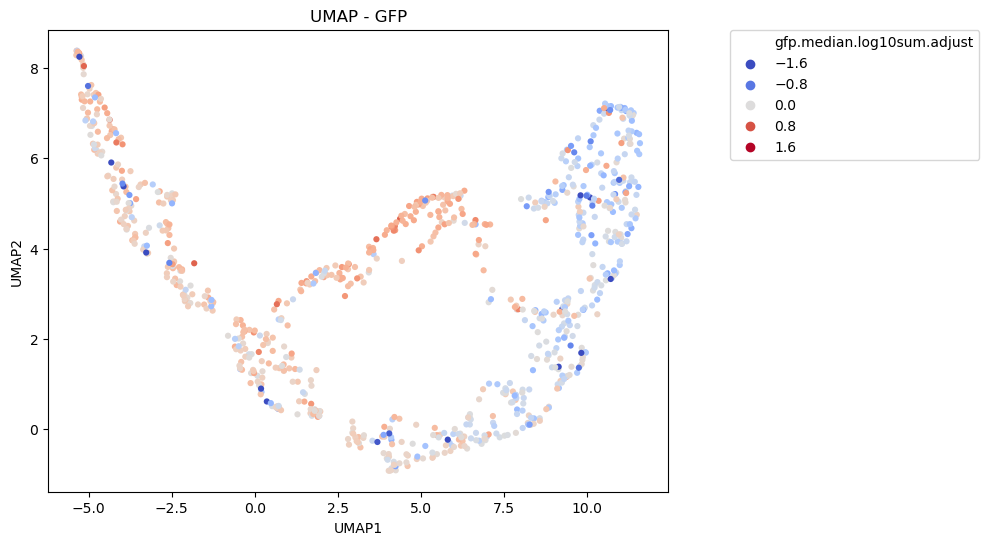

In [30]:
plt.figure(figsize=(8, 6))
            
sns.scatterplot(embedding_sub[:,0], embedding_sub[:,1], hue = labels["gfp.median.log10sum.adjust"], s = 20, linewidth=0, palette = "coolwarm", hue_norm=(-1,1))

plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP - GFP')
plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0)
#plt.savefig('.png')
plt.show()

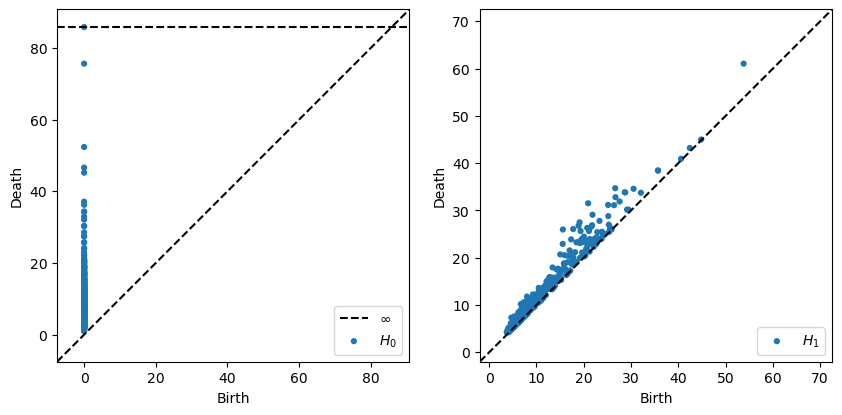

In [31]:
dgms = ripser(gene_sub.values.T, maxdim=1)['dgms']

plt.figure(figsize=(10, 5))
plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(121))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(122))

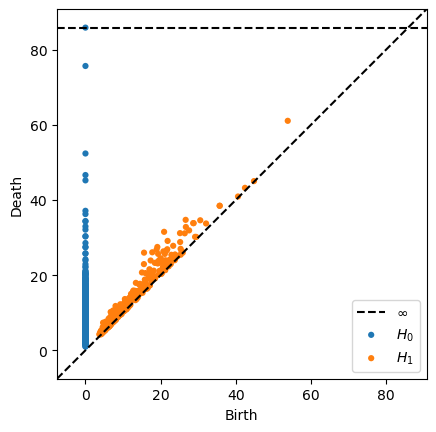

In [32]:
plot_diagrams(dgms, show=True)